In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# read the input file, link: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
data = pd.read_csv('Tweets.csv')
#shuffle the dataset so that that the same classes doesn't align together 
# reset index from 0 after shuffeling
data = data.sample(frac=1).reset_index(drop=True)  
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570070880983711744,negative,1.0000,Can't Tell,0.6702,Southwest,NaN,TheRandyHarbin,NaN,0,@SouthwestAir we can let #bags flutter because...,NaN,2015-02-23 20:01:04 -0800,Kansas City MO,Central Time (US & Canada)
1,569230445654740992,neutral,0.6517,NaN,0.0000,Delta,NaN,BernardLeCroix,NaN,0,@JetBlue I clear that folder regularly and Jet...,NaN,2015-02-21 12:21:28 -0800,"Providence, RI",Eastern Time (US & Canada)
2,568240364315783168,negative,0.6307,Customer Service Issue,0.6307,Virgin America,NaN,edzme,NaN,0,@VirginAmerica Can I get some help with a supp...,NaN,2015-02-18 18:47:14 -0800,The other side,NaN
3,570137183442608128,positive,0.6554,NaN,NaN,Delta,NaN,BonnieBitchh,NaN,0,@JetBlue sure is 💙,NaN,2015-02-24 00:24:31 -0800,NYC,Central Time (US & Canada)
4,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


In [3]:
# remove every column except the airline sentiment(label) and text(input) 
data = data[['airline_sentiment', 'text']]
data.head()


,airline_sentiment,text
0,negative,@SouthwestAir we can let #bags flutter because...
1,neutral,@JetBlue I clear that folder regularly and Jet...
2,negative,@VirginAmerica Can I get some help with a supp...
3,positive,@JetBlue sure is 💙
4,negative,@AmericanAir why would I even consider continu...


<AxesSubplot:>

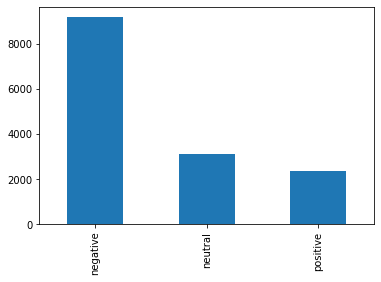

In [4]:
data['airline_sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

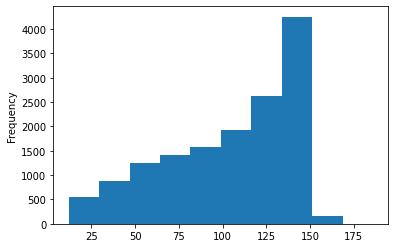

In [5]:
data['text'].str.len().plot.hist()

In [6]:

data.head()

,airline_sentiment,text
0,negative,@SouthwestAir we can let #bags flutter because...
1,neutral,@JetBlue I clear that folder regularly and Jet...
2,negative,@VirginAmerica Can I get some help with a supp...
3,positive,@JetBlue sure is 💙
4,negative,@AmericanAir why would I even consider continu...


## Preprocessing

In [7]:
#remove virginAmerica as it doesn't add and value to dataset
data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

,airline_sentiment,text
0,negative,@SouthwestAir we can let #bags flutter because...
1,neutral,@JetBlue I clear that folder regularly and Jet...
2,negative,Can I get some help with a support ticket? It...
3,positive,@JetBlue sure is 💙
4,negative,@AmericanAir why would I even consider continu...


In [8]:
#transform text to lowercase
data['text'].apply(lambda x: x.lower())

#remove the unwanted text like symbols
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x)) 
data['text'].head()

0    SouthwestAir we can let bags flutter because w...
1    JetBlue I clear that folder regularly and JetB...
2     Can I get some help with a support ticket Its...
3                                     JetBlue sure is 
4    AmericanAir why would I even consider continui...
Name: text, dtype: object

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#split the words(tokenize) and num_words: max number of words to keep based on frequency, most common 5000 will be kept in this case
tokenizer = Tokenizer(num_words=5000, split=" ")

#sets the word_index dictionary. specific number for each word
tokenizer.fit_on_texts(data['text'].values)
#print(tokenizer.word_index)

# convert the text into number sequence according to the word_index
X = tokenizer.texts_to_sequences(data['text'].values)
# print(X[:5])

# padding our text vector so they all have the same length
X = pad_sequences(X) 
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   16,   38,   34,  198,  141,  119,   38,  472, 1086,
          26,   80,    1,  126, 1789,   10,   38,   84,  198,  154,  169],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   17,    3, 1087,   26, 2723, 4604,
          10,   17,   14, 2225, 1600,   44,   20,  123,   91,    1,   19],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   34,    3,   30,  199,   46,
          25,    4,  714,  157,   64,   45,  356,  180, 1916,   68,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   17,  217,   14],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   13,   69,   76,   

## Creating Model

In [10]:
X.shape

(14640, 33)

### Model1 (Train acc: 95.74%,  Test acc: 78.11%)

In [11]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

#the input will be (batch,input_length)
#largest integer (i.e. word index) in the input should be no larger than 4999 (5000-1) (vocabulary size)
#output_dim= 256, output will (batch,input_length,256)

#return_sequences=True: It is possible to access the hidden state output for each input time step.
#it is added when we have another lstm after current lstm layer to fastern 

#dropout is for vertical arrows from x_t to h_t and recurrent dropout is for each time step i.e. horizontal x_t-2, x_t, x_t+1

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 33, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 33, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


### Model2   (Train acc: 94.07%,  Test acc: 78.31%)


In [163]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(5000, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 33, 128)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 33, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 591       
Total params: 895,391
Trainable params: 895,391
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# one-hot encode the labels i.e. the output in single step
y = pd.get_dummies(data['airline_sentiment']).values

#print the old value besides new value
[print(data['airline_sentiment'][i], y[i]) for i in range(0,5)]

negative [1 0 0]
neutral [0 1 0]
negative [1 0 0]
positive [0 0 1]
negative [1 0 0]


[None, None, None, None, None]

In [13]:
#split the data with 20% in the test set and rest in train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
#fit he model for the training data
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
#Verbosity mode. 
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch. (recommended in production)

Epoch 1/8
366/366 [==============================] - 345s 924ms/step - loss: 0.7564 - accuracy: 0.6786
Epoch 2/8
366/366 [==============================] - 367s 1s/step - loss: 0.4214 - accuracy: 0.8378
Epoch 3/8
366/366 [==============================] - 340s 929ms/step - loss: 0.3263 - accuracy: 0.8746
Epoch 4/8
366/366 [==============================] - 324s 886ms/step - loss: 0.2642 - accuracy: 0.9019
Epoch 5/8
366/366 [==============================] - 327s 893ms/step - loss: 0.2037 - accuracy: 0.9268
Epoch 6/8
366/366 [==============================] - 335s 915ms/step - loss: 0.1871 - accuracy: 0.9307
Epoch 7/8
366/366 [==============================] - 342s 935ms/step - loss: 0.1413 - accuracy: 0.9486
Epoch 8/8
366/366 [==============================] - 336s 917ms/step - loss: 0.1203 - accuracy: 0.9574


In [15]:
#test accuracy
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


92/92 [==============================] - 15s 156ms/step - loss: 0.8096 - accuracy: 0.7811
Test score: 0.8096162676811218
Test accuracy: 0.7810792326927185


### validation accuracy

In [16]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

45/45 - 7s - loss: 0.8630 - accuracy: 0.7696
score: 0.86
acc: 0.77


In [168]:
#save the model
model.save('sentiment_analysis.h5')

In [169]:
# make predictions on the test data
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

JetBlue how do I get a copy of my last flight showing original time and delay I need it for work Thanks [9.9996412e-01 3.0273588e-05 5.5517303e-06] [1 0 0]
AmericanAir made it  Thanks AA [9.9983537e-01 1.5599291e-04 8.5620450e-06] [1 0 0]
SouthwestAir can you make a premium wifi that I can pay 30 for that is decent slowfi [0.98160917 0.0121777  0.00621312] [1 0 0]
SouthwestAir you got me home over an hour and a half Late Flight but at least my baggage was delivered soaking wet [0.23026584 0.7604559  0.00927826] [1 0 0]
AmericanAir employees are racist [0.9691533  0.00155299 0.02929377] [1 0 0]


[None, None, None, None, None]

In [170]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 483
Neutral predictions: 606
Negative predictions: 1839
Real positive: 450
Real neutral: 624
Real negative: 1854


In [17]:
twt = ['It was good experience']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=33, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("neutral")
else:
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  20  23 132 196]]
1/1 - 1s
[6.7281449e-04 1.3112974e-02 9.8621422e-01]
positive
